# Objective : Learning the use of hierarchical clustering to decide initial centroids

# Identify the initial centroids for clustering TN election data

# Step 1 :  Creating the data frame using TN election csv file

In [2]:
import pandas as pd
df=pd.read_csv("C:/Users/sampa/OneDrive/Desktop/tnelections.csv")
df

,Place,ADMK,DMK,PMK,DMDK,BJP
0,Gummidpoondi,0.417,0.308,0.201,0.031,0.010
1,Ponneri,0.486,0.388,0.049,0.028,0.010
2,Tiruttani,0.418,0.314,0.133,0.070,0.025
3,Thiruvallur,0.365,0.390,0.155,0.034,0.009
4,Poonamalle,0.433,0.384,0.066,0.063,0.014
5,Avadi,0.399,0.394,0.046,0.084,0.027
6,Maduravoyal,0.401,0.367,0.070,0.079,0.018
7,Ambathur,0.411,0.335,0.072,0.072,0.042
8,Madhavaram,0.398,0.454,0.053,0.035,0.019
9,Tiruvotriyur,0.407,0.433,0.021,0.071,0.017


# Step 2 : Slicing of numerical columns

In [4]:
X=df.iloc[:,1:6]

# Step 3 : Identifying the number of clusters

In [6]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

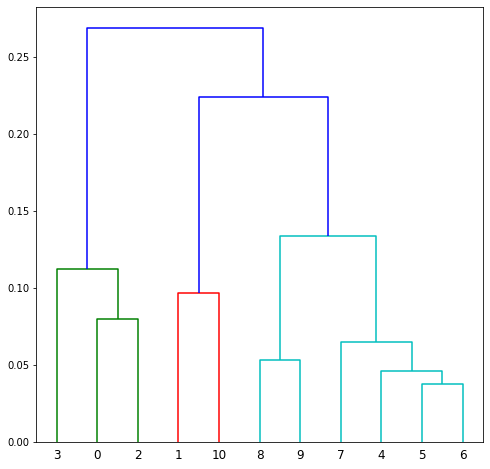

In [7]:
plt.figure(figsize=(8,8))
dend=shc.dendrogram(shc.linkage(X,method='ward',metric='euclidean'))

# The inspection of dendrogram leads us to take k=3

# Listing the members of clusters

In [13]:
from sklearn.cluster import AgglomerativeClustering
clusters=AgglomerativeClustering(n_clusters=3,linkage='ward',affinity='euclidean').fit(X)

In [29]:
labels=clusters.labels_
print(labels)

[1 2 1 1 0 0 0 0 0 0 2]


# Computing centroids

In [30]:
# storing the labels of the three cluster
import numpy as np
cl0=np.where(labels==0)
cl1=np.where(labels==1)
cl2=np.where(labels==2)

In [40]:
# Slicing the rows corresponding to the three clusters
X1=X.iloc[list(cl0[0]),]
X2=X.iloc[list(cl1[0]),]
X3=X.iloc[list(cl2[0]),]

In [46]:
# Computing the centroids
m1=np.mean(X1)
m2=np.mean(X2)
m3=np.mean(X3)

In [49]:
print("The 3 centroids are ",m1,m2,m3)

The 3 centroids are  ADMK    0.408167
DMK     0.394500
PMK     0.054667
DMDK    0.067333
BJP     0.022833
dtype: float64 ADMK    0.400000
DMK     0.337333
PMK     0.163000
DMDK    0.045000
BJP     0.014667
dtype: float64 ADMK    0.5225
DMK     0.3595
PMK     0.0365
DMDK    0.0225
BJP     0.0135
dtype: float64
